## Model definition:

$$
{w_{RR}} = \arg \mathop {\min }\limits_w {\left\| {y - Xw} \right\|^2} + \lambda g\left( w \right)
$$

$${w_{RR}} = \arg \mathop {\min }\limits_w {\left\| {y - Xw} \right\|^2} + \lambda {\left\| w \right\|^2}$$

We have:

$L = {\left\| {y - Xw} \right\|^2} + \lambda {\left\| w \right\|^2}$

$ {\nabla _w}L = {\nabla _w}\left( {{{\left\| {y - Xw} \right\|}^2} + \lambda {{\left\| w \right\|}^2}} \right)$

$ {\nabla _w}L = {\nabla _w}\left( {{{\left( {y - Xw} \right)}^T}\left( {y - Xw} \right) + \lambda {w^T}w} \right)$


$ {\nabla _w}L = {\nabla _w}\left( {{y^T}y - {y^T}Xw - {w^T}{X^T}y + {w^T}{X^T}Xw + \lambda {w^T}w} \right)$

${\nabla _w}L = {\nabla _w}\left( { - {w^T}{X^T}y - {w^T}{X^T}y + {w^T}{X^T}Xw + \lambda {w^T}w} \right)$

$\Rightarrow  - 2{X^T}y + 2{X^T}Xw + 2\lambda w = 0$

$\Leftrightarrow \left( {2{X^T}X + 2\lambda I} \right)w = 2{X^T}y$

$\Leftrightarrow w = {\left( {{X^T}X + \lambda I} \right)^{ - 1}}{X^T}y$



## How to fit it:
    - Separate the the training data to 2 parts X = train[:,1:len(X[0])-1] and y = train[:,-1]
    - Create the identity matrix I
    - Choose the lambda
    - Find the weight of Lieaner Regression by the below formula:

$$\Leftrightarrow w = {\left( {{X^T}X + \lambda I} \right)^{ - 1}}{X^T}y$$

## How to use it:
    1. Slicing the testing data 
$$x_{new} = test[:,1:]$$
    2. Find the new data by the formula.
$${y_{new}} \approx {x_{new}}^T.{w_{LS}}$$

In [26]:
import numpy as np

class RidgeRegression:
    def __init__(self,lamda):
        self.lamda = lamda

    def fit(self, X, y):
        self.w = 0
        X_t = X.transpose()
        X_tX = np.matmul(X_t, X)
        id_mat = np.identity(len(X_tX))
        temp = self.lamda*id_mat + X_tX
        temp = temp.astype("Float32")
        invX_tX = np.linalg.inv(temp)
        a = np.matmul(invX_tX,X_t)
        self.w = np.matmul(np.matmul(invX_tX,X_t),y)
        
    def predict(self, x):
        y = np.matmul(x.transpose(), self.w)
        return y

# Line Regression

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


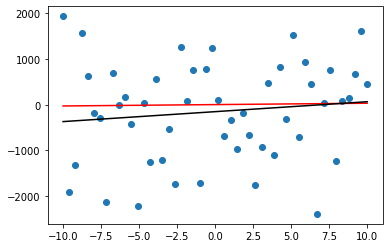

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
a = 3
b = 4
x = np.linspace(-10, 10, n)
X = np.array([[1,i] for i in x ])
y = a* x + b + np.random.normal(0,1000,n)
classifier = RidgeRegression(5)
classifier.fit(X,y)

plt.scatter(x,y)
plt.plot(x, a*x + b, color = 'r')
plt.plot(x,classifier.w[0]+classifier.w[1]*x,color = 'black')

# Parabola Regression

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


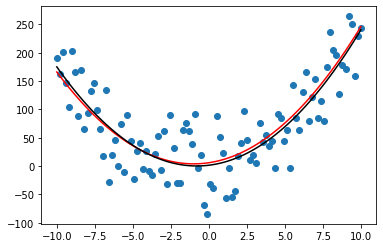

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 100
a = 2
b = 4
c = 6
x = np.linspace(-10, 10, n)
X = np.array([[1 , i, i*i] for i in x])
y = a*x*x + b*x + c + np.random.normal(0,40,n)
classifier = RidgeRegression(5)
classifier.fit(X,y)

plt.scatter(x,y)
plt.plot(x, a*x*x + b*x + c, color = 'r')
plt.plot(x,classifier.w[0]+classifier.w[1]*x+classifier.w[2]*x*x,color = 'black')

# Kaggle Regression

In [21]:
# Transform the training and testting data
import pandas as pd

df_train = pd.read_csv("../data/house-price/data/train.csv")
df_test = pd.read_csv("../data/house-price/data/test.csv")
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
df_train = df_train.to_numpy()
df_test = df_test.to_numpy()
for i in range(1,len(df_train[0])-1):
    k = 1.0
    dic = {}
    
    #Transform the training data
    for j in range(len(df_train)):
        if df_train[:,i][j] == "None":
            df_train[:,i][j] = 0.0
            continue
        if type(df_train[:,i][j]) is str:
            if df_train[:,i][j] not in dic:
                dic[df_train[:,i][j]] = k
                k += 1
            df_train[:,i][j] = dic[df_train[:,i][j]]
            
    #Transform the testing data
    for j in range(len(df_test)):
        if type(df_test[:,i][j]) is str:
            if df_test[:,i][j] == "None":
                df_test[:,i][j] = 0.0
                continue
            df_test[:,i][j] = dic[df_test[:,i][j]]

In [32]:
classifier = RidgeRegression(0.5)
X = df_train[:,1:-1]
y = df_train[:,-1]
X = np.insert(X, 0, 1, axis=1)

f = open("../data/house-price/outputs/submission_ridge-regression.csv", "w")
f.write("Id,SalePrice\n" )
test = np.insert(df_test, 1, 1, axis=1)
for i in range(len(test)):
    a = classifier.predict(test[i][1:])
    f.write(str(test[i][0]) + "," + str(round(a, 1)) +"\n")
f.close()

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

## Use scikit learn

In [35]:
#Import functions
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [34]:
# Transform the training and testting data
df_train = pd.read_csv("../data/house-price/data/train.csv")
df_test = pd.read_csv("../data/house-price/data/test.csv")
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
df_train = df_train.to_numpy()
df_test = df_test.to_numpy()
for i in range(1,len(df_train[0])-1):
    k = 1.0
    dic = {}
    
    #Transform the training data
    for j in range(len(df_train)):
        if df_train[:,i][j] == "None":
            df_train[:,i][j] = 0.0
            continue
        if type(df_train[:,i][j]) is str:
            if df_train[:,i][j] not in dic:
                dic[df_train[:,i][j]] = k
                k += 1
            df_train[:,i][j] = dic[df_train[:,i][j]]
            
    #Transform the testing data
    for j in range(len(df_test)):
        if type(df_test[:,i][j]) is str:
            if df_test[:,i][j] == "None":
                df_test[:,i][j] = 0.0
                continue
            df_test[:,i][j] = dic[df_test[:,i][j]]

In [36]:
X = df_train[:,1:-1]
y = df_train[:,-1]
test = df_test[:,1:]
id_test = df_test[:,0]
scaler = MinMaxScaler()
scaler.fit(X)
X_transform = scaler.transform(X)
test_transform = scaler.transform(test)

In [42]:
linridge = Ridge(alpha = 30).fit(X_transform,y)
predictions = linridge.predict(test_transform)
f = open("../data/house-price/outputs/submission_submission_ridge-regression_sklearn.csv", "w")
f.write("Id,SalePrice\n" )
test = np.insert(df_test, 1, 1, axis=1)
for i in range(len(predictions)):
    f.write(str(id_test[i]) + "," + str(round(predictions[i], 1)) +"\n")
f.close()